# Capstone 2: Healthcare Costs and it's Determining Factors

Smoking is a hard habit to break, with many experts all but proving it is detrimental to health. Does is also increase overall healthcare charges for the average person? Using a dataset containing data on number of children, age, smoking habits, BMI, and US region, I will outline why smoking does affect charges, being correlated to increasing costs. the first 5 data points can be seen below:

In [2]:
#but first, let's import the necessary libraries to do our analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [243]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [11]:
#and import the csv file

medical_costs = pd.read_csv("/Users/jakeclement/Documents/Medical_Costs.csv")
medical_costs2 = pd.read_csv("/Users/jakeclement/Documents/Medical_Costs.csv")

medical_costs2.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


# The Cost of Smoking

Looking at our data, we can make some inferences just off common knowledge. Smoking is almost universally known to be detrimental to health, which should also increase healthcare costs. Taking a look at average costs: 

In [9]:
smoker = medical_costs['smoker'] == 'yes'
non_smoker = medical_costs['smoker'] == 'no'
medical_costs_smoker = medical_costs[smoker]
medical_costs_nsmoker = medical_costs[non_smoker]
df_mc_s = medical_costs_smoker['charges'].mean()
df_mc_ns = medical_costs_nsmoker['charges'].mean()
print('The average medical charges for non-smokers is', ' $',  df_mc_ns)
print('The average medical charges for smokers is', ' $', df_mc_s)

The average medical charges for non-smokers is  $ 8434.268297856199
The average medical charges for smokers is  $ 32050.23183153285


the average healthcare charges for a smoker are almost 4 times as great when compared to non-smokers.

this sentiment can also be seen graphically:

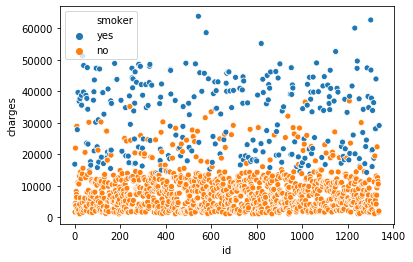

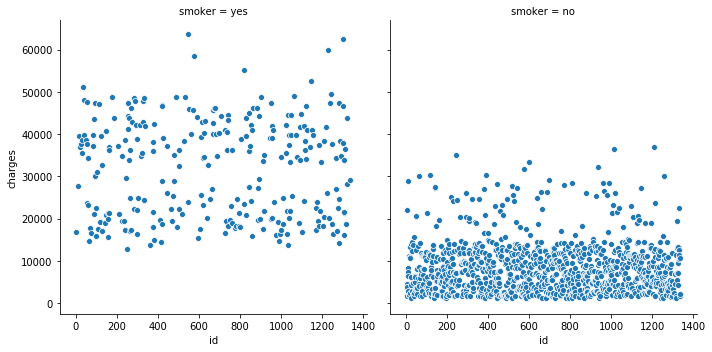

In [10]:
sns.scatterplot(
    x='id', 
    y='charges', 
    data=medical_costs, 
    hue='smoker')

sns.relplot(
    x='id', 
    y='charges', 
    data=medical_costs, 
    kind= "scatter", 
    col='smoker')

# Does Smoking affect other factors?

When we plot smoking on top of our other variables, such as BMI and age, we can see our trend coming through once again:

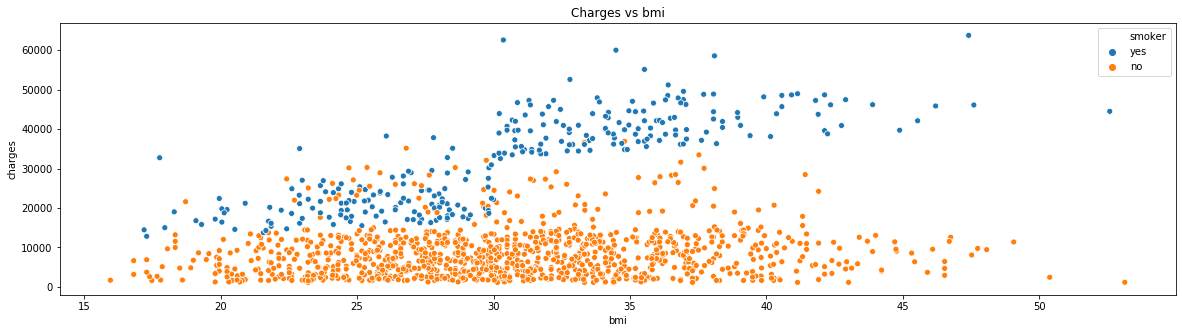

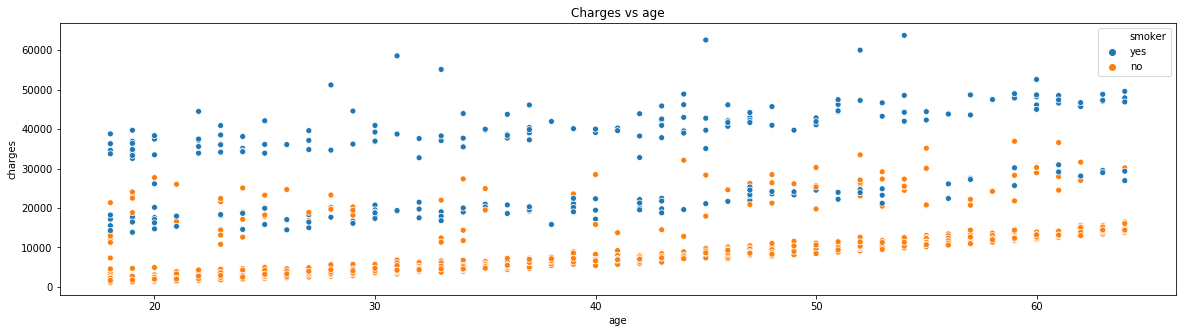

In [246]:
#medical_costs.columns
comparison = ['bmi', 'age',]

for item in comparison:
    sns.scatterplot(
    x=item, 
    y='charges', 
    data=medical_costs2, 
    hue='smoker')
    plt.title("Charges vs " + str(item))
    plt.show()

on the BMI chart, there seems to be an almost linear vertical trend of increasing costs as your BMI increases as well as when you smoke.

Here we see a much higher maximum, as well as minimum costs when someone smokes as opposed to a nonsmoker, over our Age chart.

Taking a look at distributions through box plots:

                    Weight/Age Distributions of Smokers and Nonsmokers:

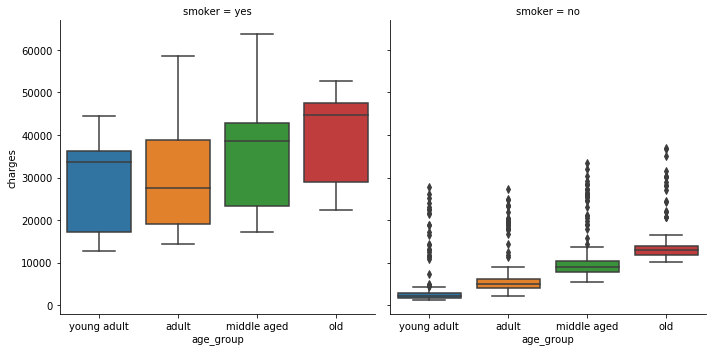

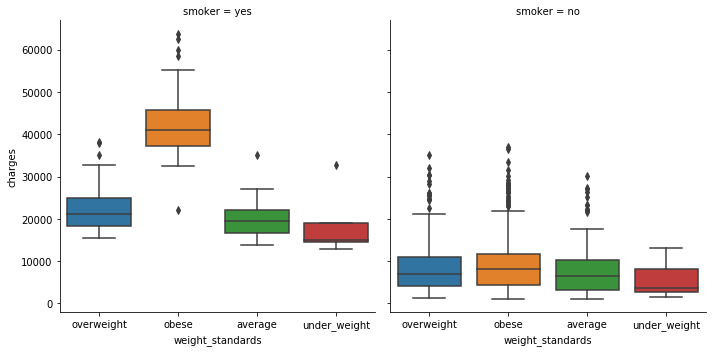

In [40]:
Q1 = medical_costs2.quantile(q=0.05)
Q3 = medical_costs2.quantile(q=0.95)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR


medical_costs_no_outliers = medical_costs2[ ~ ((medical_costs2 < lower_limit) | ((medical_costs2 > upper_limit))).any(axis=1)]

sns.catplot(x='age_group', y='charges', data=medical_costs_no_outliers, kind='box', col='smoker')
sns.catplot(x='weight_standards', y='charges', data=medical_costs_no_outliers, kind='box', col='smoker')

We again see a higher minimum cost in smokers, for each age group as opposed to nonsmokers, as well as much larger cost ranges.

and when looking at weight standards derived from BMI, there is a noticeable spike in costs when someone is a smoker and also obese. On overall trend, there is once again higher minimum and maximum charges for smokers in all weight categories when compared to non smokers. This is even more pronounced in the box plot below:

                Weight Distributions of Smokers and Nonsmokers:

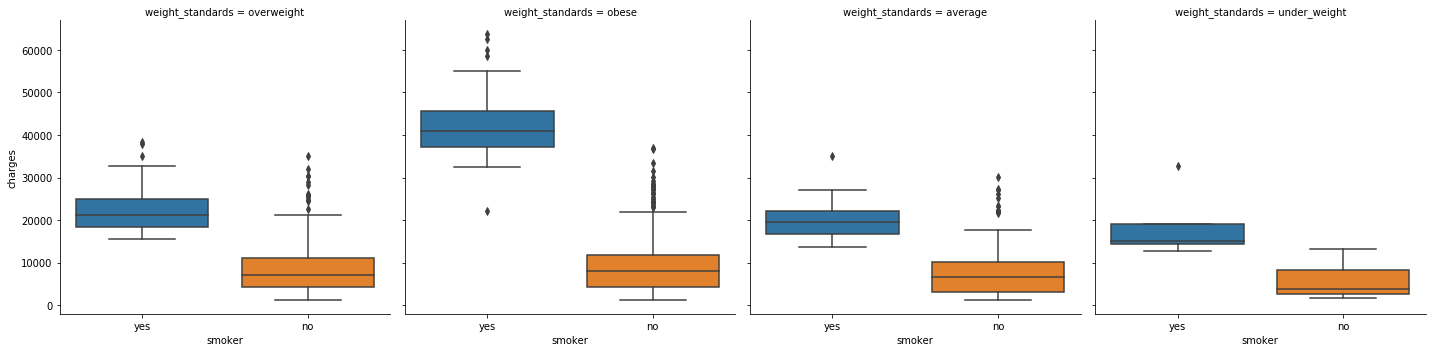

In [36]:
sns.catplot(x='smoker', y='charges', data=medical_costs2, kind='box', col='weight_standards')

# Do we see the same trends in other factors?

As seen in previous graphs, we used CDC standards to categorize BMI, and better analyze our data. Once we've categorized BMI similarly to smoking, we can look at each group and what differences in costs are apparent.

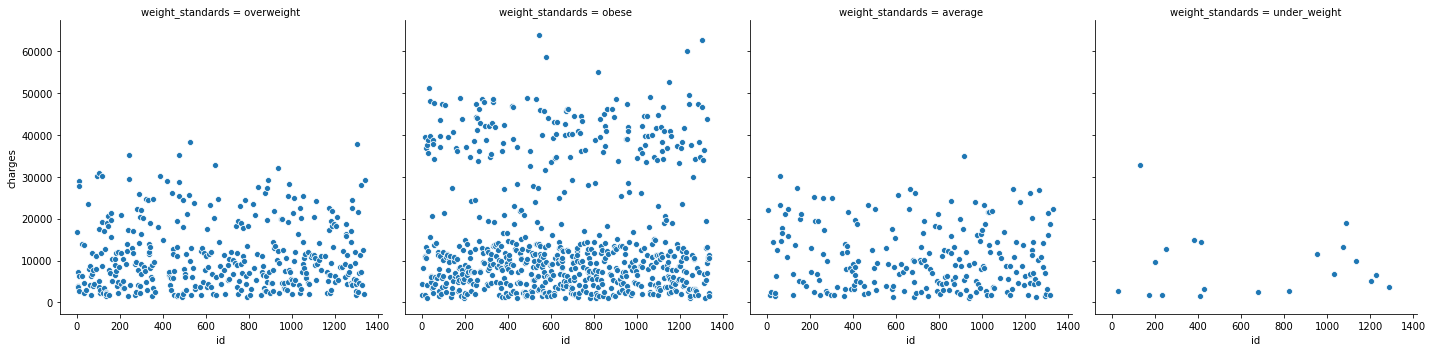

In [17]:
conditions = [
    (medical_costs['bmi'] < 18.5),
    (medical_costs['bmi'] >= 18.5) & (medical_costs['bmi'] < 25),
    (medical_costs['bmi'] >= 25) & (medical_costs['bmi'] < 30),
    (medical_costs['bmi'] >= 30)]

values = ['under_weight', 'average', 'overweight', 'obese']

medical_costs['weight_standards'] = np.select(conditions, values)

sns.relplot(
    x='id', 
    y='charges', 
    data=medical_costs, 
    kind='scatter', 
    col='weight_standards')

we cant see a direct visual link to higher BMI and higher costs, but we can see that there seems to be a wall above $35000, where only people in the "obese" category show up.

applying the same filtering of our data for weight standards:

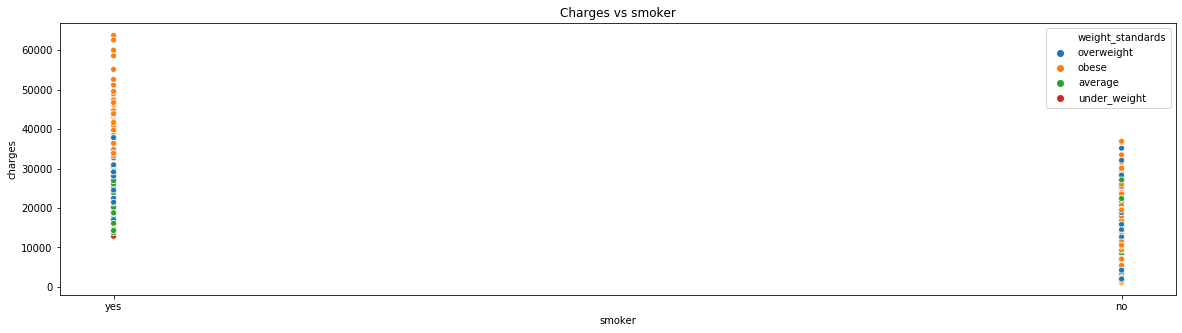

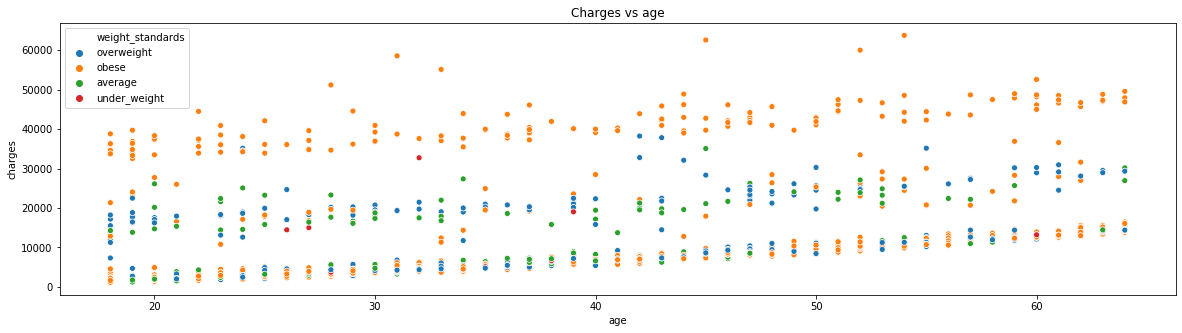

In [250]:
bmi_comparison = ['smoker', 'age']

for item in bmi_comparison:
    sns.scatterplot(
    x=item, 
    y='charges', 
    data=medical_costs2, 
    hue='weight_standards')
    plt.title("Charges vs " + str(item))
    plt.show()

There does seem to be somewhat of a trend with Obesity having higher costs for smokers, as well as higher maximum costs regardless of age. But this is not as conclusive as what we see for our smoking variable. 

What about age?


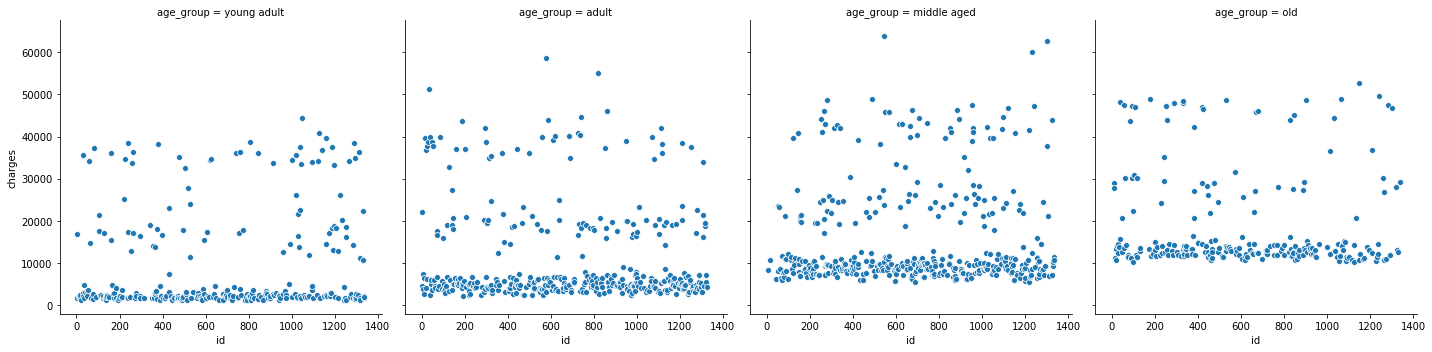

In [22]:
age_conditions =[
    (medical_costs['age'] > 17) & (medical_costs['age'] < 25),
    (medical_costs['age'] >= 25) & (medical_costs['age'] < 40),
    (medical_costs['age'] >= 40) & (medical_costs['age'] < 55),
    (medical_costs['age'] >= 55)
]
age_values = ['young adult', 'adult', 'middle aged', 'old']
medical_costs['age_group'] = np.select(age_conditions, age_values)

sns.relplot(
    x='id', 
    y='charges', 
    data=medical_costs, 
    kind='scatter', 
    col='age_group')

The minimum and maximum amount charged does increase with age, but the overall trend seems to follow suit for each age group. This is to be fairly expected, and our clusters of data are consistent for each group, and not as pronounced as our smoker data.

Recreating our Charges vs BMI chart by age groups, instead of smoking:

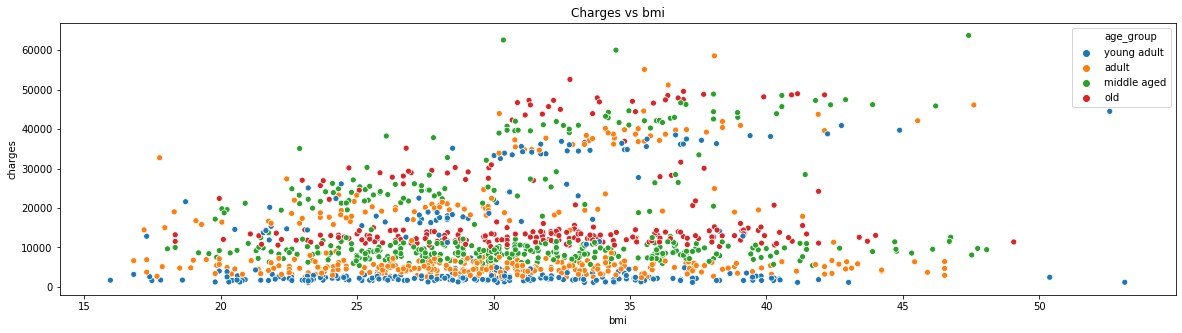

In [249]:
age_comparison = ['bmi']

for item in age_comparison:
    sns.scatterplot(
    x=item, 
    y='charges', 
    data=medical_costs2, 
    hue='age_group')
    plt.title("Charges vs " + str(item))
    plt.show()

We again cannot draw as clear of a conclusion from this as we can with smoking.

Visual comparisons can only do so much for us, lets move into checking correlations and running a regression, to get some concrete answers.

# Checking for Correlation 

In [25]:
#creating boolean columns for each object column
#To get T/F without adding too many new variables, age&weight columns have been simplified to two groups

conditions_s= [
    (medical_costs['smoker'] == 'yes'),
    (medical_costs['smoker'] == 'no')
]
values_s = [1,0]
medical_costs['smoker (1 or 0)'] = np.select(conditions_s, values_s)

conditions_w =[
    (medical_costs['weight_standards']== 'overweight') | 
    (medical_costs['weight_standards'] == 'obese'),
    (medical_costs['weight_standards'] == 'under_weight') |
    (medical_costs['weight_standards'] == 'average')
    
]
values_w = [1,0]
medical_costs['overweight (1 or 0)'] = np.select(conditions_w, values_w)

conditions_a = [
    (medical_costs['age_group'] == 'middle aged') |
    (medical_costs['age_group'] == 'old'),
    (medical_costs['age_group'] == 'young adult') |
    (medical_costs['age_group'] == 'adult')
]
values_a = [1,0]
medical_costs['Over_the_Hill (1 or 0)'] = np.select(conditions_a, values_a)


corr_medical_costs = medical_costs.corr()

In [47]:
df_concat_corr = concatted_df.corr()

#sns.heatmap(data=df_concat_corr[['smoker_no', 
#                                 'smoker_yes', 
#                                 'weight_standards_obese', 
#                                 'weight_standards_overweight', 
#                                 'weight_standards_average', 
#                                 'weight_standards_under_weight', 
#                                 'age_group_young adult',
#                                 'age_group_adult',
#                                 'age_group_middle aged',
#                                 'age_group_old',
#                                 'charges',
#                                 'age',
#                                 'bmi',
#                                 'children']],
#            annot=True, 
#            annot_kws= {"size" : 6})
#plt.title('Correlation of Health Factors')

Text(0.5, 1.0, 'Correlation of Health Factors')

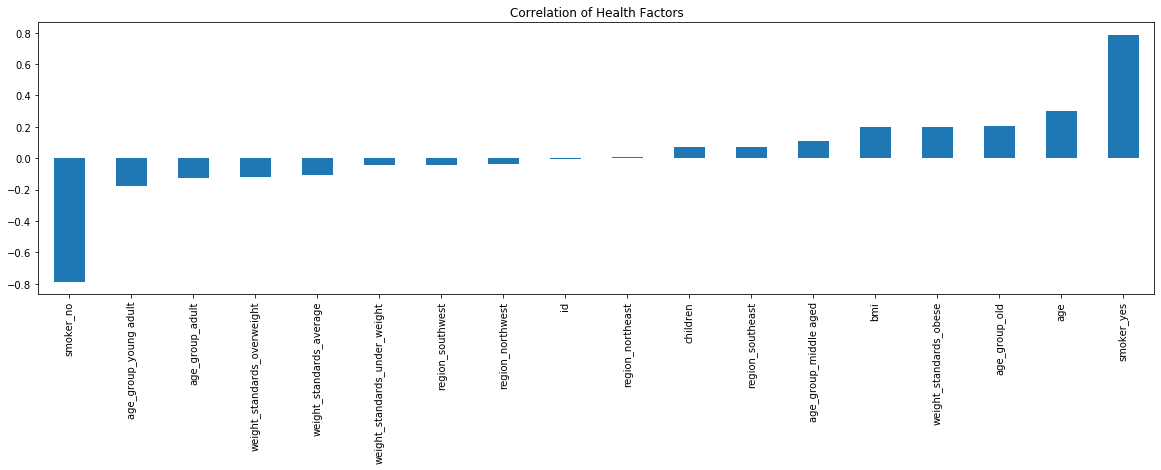

In [49]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
df_concat_corr['charges'].sort_values()[0:18].plot(kind='bar')
plt.title('Correlation of Health Factors')

When checking correlation related to charges, there is a high positive correlation between charges and smoking (charges go up when you smoke), and a high negative correlation between charges and not smoking (charges decrease when you don't smoke).
Here we have the answer we set out to find: Smoking does increase healthcare costs.

For weight standards and age groups, we don't see as convincing of correlations to confidently say they affect charges in the same way smoking does. 

With this new information, we can run a regression to find an ideal model, as well as test these variable's statistical significance:

# Running a Regression

In [51]:
independent_variable2 = concatted_df[[
    'smoker_no', 
    'smoker_yes', 
    'weight_standards_obese',   
    'age_group_young adult',
    'age',
    'bmi',
    'children']]

dependent_variable2 = concatted_df["charges"]

indepent_variable2 = sm.add_constant(independent_variable2)
regression_model2 = sm.OLS(dependent_variable2, independent_variable2).fit()
regression_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     690.4
Date:                Sat, 23 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:20:33   Log-Likelihood:                -13532.
No. Observations:                1338   AIC:                         2.708e+04
Df Residuals:                    1331   BIC:                         2.711e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
smoker_no              -9846.8412   1376.997     -7.151      0.000   -1.25e+04   -7145.521
smoker_yes              1.398e+04   1410.731      9.907      0.000    1.12e+04    1.67e+04
weight_standards_obese  2808.2837    546.135      5.142      0.000    1736.904    3879.664
age_group_young adult   1887.6262    576.835      3.272      0.001     756.022    3019.231
age                      295.4159     16.378     18.038      0.000     263.287     327.545
bmi                      134.8987     44.774      3.013      0.003      47.063     222.734
children                 588.0409    140.321      4.191      0.000     312.766     863.316
==============================================================================
Omnibus:                      329.035   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.138
Skew:                           1.301   Prob(JB):                    3.32e-181
Kurtosis:                       5.853   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

with an R-Squared of 0.75 and P values under 0.05 for all our variables: we have identified the significant variables with respect to charges, and created a well fitting linear model. 

Lastly, lets create a prediction variable for charges, and truly see if our model correlates with actual costs.

Text(0.5, 1.0, 'Correlated Prediction')

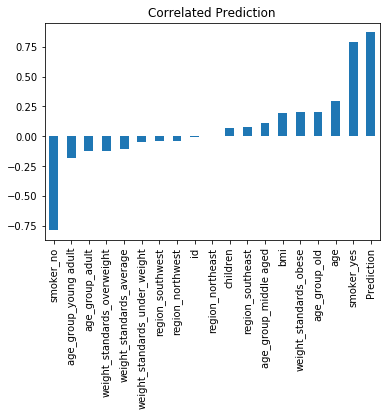

In [46]:
concatted_df['Prediction'] = regression_model2.predict(independent_variable2)
df_concat_corr2 = concatted_df.corr()
df_concat_corr2['charges'].sort_values()[0:19].plot(kind='bar')
plt.title('Correlated Prediction')

Our predictive variable was highly correlated to costs, showing our linear model is a good fit, and healthcare charges are dependent on whether a person smokes or not.

# Appendixing Previous Regression Results

the regression run below was a first attempt at finding a linear model, and our above regression is based on these results.

In [230]:
independent_variable2 = concatted_df[[
    'smoker_no', 
    'smoker_yes', 
    'weight_standards_obese',  
    'weight_standards_under_weight', 
    'age_group_young adult',
    'age_group_adult',
    'age_group_middle aged',
    'age_group_old',
    'age',
    'bmi',
    'children']]

dependent_variable2 = concatted_df["charges"]

indepent_variable2 = sm.add_constant(independent_variable2)
regression_model2 = sm.OLS(dependent_variable2, independent_variable2).fit()
regression_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     414.1
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:28:46   Log-Likelihood:                -13530.
No. Observations:                1338   AIC:                         2.708e+04
Df Residuals:                    1327   BIC:                         2.714e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
smoker_no                     -1.027e+04   1109.739     -9.258      0.000   -1.25e+04   -8097.294
smoker_yes                     1.357e+04   1140.741     11.892      0.000    1.13e+04    1.58e+04
weight_standards_obese         3196.2241    987.378      3.237      0.001    1259.231    5133.217
weight_standards_overweight     341.0109    702.108      0.486      0.627   -1036.351    1718.373
weight_standards_average        152.1116    624.074      0.244      0.807   -1072.169    1376.392
weight_standards_under_weight  -398.4628   1189.698     -0.335      0.738   -2732.356    1935.431
age_group_young adult          2311.1255    626.423      3.689      0.000    1082.238    3540.013
age_group_adult                 509.1739    456.619      1.115      0.265    -386.600    1404.947
age_group_middle aged           -64.1962    877.808     -0.073      0.942   -1786.239    1657.847
age_group_old                   534.7805   1391.859      0.384      0.701   -2195.703    3265.264
age                             300.0982     44.376      6.763      0.000     213.043     387.154
bmi                             120.8663     52.368      2.308      0.021      18.134     223.599
children                        617.7909    142.741      4.328      0.000     337.768     897.814
==============================================================================
Omnibus:                      333.687   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.755
Skew:                           1.315   Prob(JB):                    1.82e-185
Kurtosis:                       5.888   Cond. No.                     5.97e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.88e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""